In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.ExcelFile('/Users/user/desktop/LoanStats3a.xlsx')
df1 = data.parse(0)
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,met_credit_policy
0,NaN,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,2018-08-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
1,NaN,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,2016-10-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
2,NaN,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,2017-06-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
3,NaN,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,2016-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y
4,NaN,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,2018-04-01,0.0,N,NaT,NaN,NaT,NaN,NaN,NaN,Y


# Cleaning Data

In [2]:
# filling in member id column and setting it as index
member_id_entries = np.arange(1,len(df1)+1)
df1['member_id'] = member_id_entries
df1 = df1.set_index('member_id')

In [3]:
np.arange(1,len(df1)+1)

array([    1,     2,     3, ..., 42533, 42534, 42535])

In [4]:
# Deleting columns with vague data
del df1['id'] # Replaced with member id
del df1['title']
del df1['emp_title']
del df1['desc']
# Settlements are post loans and can't be used for prediction of a loans that preceeds settlement. 
del df1['debt_settlement_flag']
del df1['debt_settlement_flag_date']
del df1['settlement_status']
del df1['settlement_date']
del df1['settlement_amount']
del df1['settlement_percentage']
del df1['settlement_term']
del df1['met_credit_policy']
# Deleting datetime
del df1['earliest_cr_line']
del df1['last_pymnt_d']
del df1['last_credit_pull_d']
# Irrelavent columns deleted 
del df1['pymnt_plan']
del df1['initial_list_status']
del df1['issue_d']
del df1['recoveries']
del df1['zip_code']
del df1['addr_state']
del df1['total_pymnt_inv']
del df1['total_rec_late_fee']
del df1['collection_recovery_fee']
del df1['last_pymnt_amnt']
del df1['sub_grade']
del df1['mths_since_last_delinq'] # over half of data missing
del df1['mths_since_last_record'] # over half of data missing 

In [5]:
# Count of nan's per column
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1112
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util                90
total_acc                 29
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
pub_rec_bankruptcies    1365
dtype: int64

In [6]:
# Percentage of nan's per column
(df1.isna().sum()/len(df1))

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              0.026143
home_ownership          0.000000
annual_inc              0.000094
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000682
inq_last_6mths          0.000682
open_acc                0.000682
pub_rec                 0.000682
revol_bal               0.000000
revol_util              0.002116
total_acc               0.000682
total_pymnt             0.000000
total_rec_prncp         0.000000
total_rec_int           0.000000
pub_rec_bankruptcies    0.032091
dtype: float64

In [7]:
df1.shape

(42535, 25)

In [8]:
# Max amount of Nan's for rows
(df1.isna().sum(axis=1)).max()

8

In [9]:
# Deleting rows with 8 nans
df1 = df1.drop(df1[df1.isna().sum(axis=1) == df1.isna().sum(axis=1).max()].index)

In [10]:
# Second most amount of nan's for rows
(df1.isna().sum(axis=1)).max()

7

In [11]:
# Deleting rows with 7 nanx
df1 = df1.drop(df1[df1.isna().sum(axis=1)==(df1.isna().sum(axis=1)).max()].index)

In [12]:
# Third most amount of nans in rows. Two is tolerable
(df1.isna().sum(axis=1)).max()

2

In [13]:
# Analyzing the relationship between bankruptcies and public records. It seems that bankruptcies are a sub set
# of public records. Therefore, rows with NANs for bankruptcies that have 0 public records must have 0 bankrupcies.
print('Amount of bankruptcies without public records:', len(df1[(df1.pub_rec_bankruptcies>0) & (df1.pub_rec==0)]))
print('Amount of bankruptcies with public records:', len(df1[(df1.pub_rec_bankruptcies>0) & (df1.pub_rec>0)]))
print('Amount of bankruptcies:', len(df1[(df1.pub_rec_bankruptcies>0)]))
print('Amount of NAN bankruptcies without public records:', len(df1[df1.pub_rec_bankruptcies.isna()][df1.pub_rec==0]))
print('Amount of NAN bankruptcies:', len(df1[df1.pub_rec_bankruptcies.isna()]))
print('Amount of non bankruptcies with public records:', len(df1[(df1.pub_rec_bankruptcies==0) & (df1.pub_rec>0)]))

Amount of bankruptcies without public records: 0
Amount of bankruptcies with public records: 1854
Amount of bankruptcies: 1854
Amount of NAN bankruptcies without public records: 1286
Amount of NAN bankruptcies: 1336
Amount of non bankruptcies with public records: 472


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [14]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1112
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                61
total_acc                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
pub_rec_bankruptcies    1336
dtype: int64

In [15]:
# Filling in nan's for bankruptcies that have 0 public records with zeros.
df1['pub_rec_bankruptcies'][(df1.pub_rec_bankruptcies.isna())&(df1.pub_rec==0)] = \
        df1['pub_rec_bankruptcies'].fillna(value=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1112
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                61
total_acc                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
pub_rec_bankruptcies      50
dtype: int64

In [19]:
# Dropping the rows with nan bankruptcies and at least one public record. There is no way of knowing if those
# public records are bankruptcies, therefore these rows are deleted. 50 out of 42000 plus rows, that's tolerable
df1 = df1.drop(df1[df1.pub_rec_bankruptcies.isna()].index, axis=0)

In [20]:
df1.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1112
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                61
total_acc                  0
total_pymnt                0
total_rec_prncp            0
total_rec_int              0
pub_rec_bankruptcies       0
dtype: int64

In [21]:
# filling in member id column
member_id_entries = np.arange(1,len(df1)+1)
df1['member_id'] = member_id_entries
df1 = df1.set_index('member_id')

In [22]:
# filling missing data according to what makes most sense on a case by case basis. 
df1['revol_util'] = df1['revol_util'].fillna(value = df1.revol_util.mean())
df1['emp_length'] = df1['emp_length'].fillna(method = 'ffill')

# Turning objects to category data types
df1.grade = df1.grade.astype('category')
df1.term = df1.term.astype('category')
df1.emp_length = df1.emp_length.astype('category')
df1.home_ownership = df1.home_ownership.astype('category')
df1.verification_status = df1.verification_status.astype('category')
df1.loan_status = df1.loan_status.astype('category')
df1.purpose = df1.purpose.astype('category')

In [23]:
# Making it so that the loan status column only has two values, fully paid and charged off, or defaulted
df1.loan_status = df1.loan_status.replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
df1.loan_status = df1.loan_status.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')

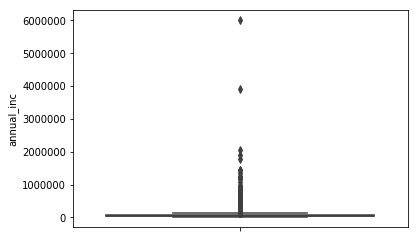

In [24]:
# Analysis of outliers in annual income 
sns.boxplot(data=df1, y='annual_inc')
plt.show()

In [25]:
# Dropping those with more than 2,000,000 dollars in annual income, outliers
df1 = df1.drop(df1[df1.annual_inc>2000000].index, axis=0)

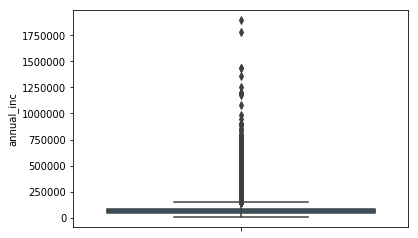

In [26]:
sns.boxplot(data=df1, y='annual_inc')
plt.show()

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42453 entries, 1 to 42456
Data columns (total 27 columns):
loan_amnt               42453 non-null int64
funded_amnt             42453 non-null int64
funded_amnt_inv         42453 non-null float64
term                    42453 non-null category
int_rate                42453 non-null float64
installment             42453 non-null float64
grade                   42453 non-null category
emp_length              42453 non-null category
home_ownership          42453 non-null category
annual_inc              42453 non-null float64
verification_status     42453 non-null category
loan_status             42453 non-null int64
purpose                 42453 non-null category
dti                     42453 non-null float64
delinq_2yrs             42453 non-null float64
inq_last_6mths          42453 non-null float64
open_acc                42453 non-null float64
pub_rec                 42453 non-null float64
revol_bal               42453 non-null int64


In [27]:
# Exporting cleaned data to CSV
df1.to_csv('Loan_data.csv')

In [28]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'pub_rec_bankruptcies'],
      dtype='object')

In [29]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,pub_rec_bankruptcies
member_id,,,,,,,,,,,,,,,,,,,,,
1,5000,5000,4975.0,36 months,0.1065,162.87,B,10+ years,RENT,24000.0,...,1.0,3.0,0.0,13648,0.837,9.0,5863.155187,5000.00,863.16,0.0
2,2500,2500,2500.0,60 months,0.1527,59.83,C,< 1 year,RENT,30000.0,...,5.0,3.0,0.0,1687,0.094,4.0,1014.530000,456.46,435.17,0.0
3,2400,2400,2400.0,36 months,0.1596,84.33,C,10+ years,RENT,12252.0,...,2.0,2.0,0.0,2956,0.985,10.0,3005.666844,2400.00,605.67,0.0
4,10000,10000,10000.0,36 months,0.1349,339.31,C,10+ years,RENT,49200.0,...,1.0,10.0,0.0,5598,0.210,37.0,12231.890000,10000.00,2214.92,0.0
5,3000,3000,3000.0,60 months,0.1269,67.79,B,1 year,RENT,80000.0,...,0.0,15.0,0.0,27783,0.539,38.0,4066.908161,3000.00,1066.91,0.0


# Exploratory Data Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

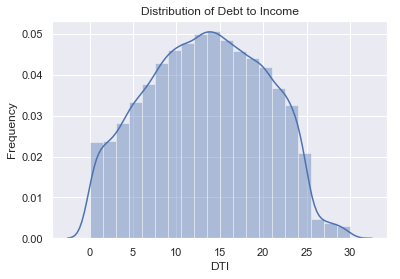

In [32]:
dist_dti = sns.distplot(df1['dti'], bins=20)
dist_dti.set(xlabel='DTI', ylabel='Frequency')
dist_dti.set_title('Distribution of Debt to Income')
plt.show()

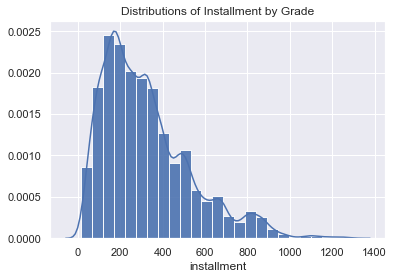

In [33]:
distinst = sns.distplot(df1['installment'], hist_kws={'alpha':0.9}, bins=25)
distinst.set(title='Distributions of Installment by Grade')
plt.show()

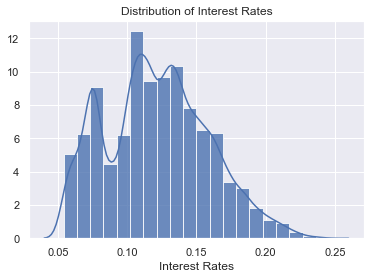

In [34]:
intrated = sns.distplot(df1['int_rate'], bins=20, hist_kws={'alpha':0.8})
intrated.set(xlabel='Interest Rates', title='Distribution of Interest Rates')
plt.show()

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42453 entries, 1 to 42456
Data columns (total 25 columns):
loan_amnt               42453 non-null int64
funded_amnt             42453 non-null int64
funded_amnt_inv         42453 non-null float64
term                    42453 non-null category
int_rate                42453 non-null float64
installment             42453 non-null float64
grade                   42453 non-null category
emp_length              42453 non-null category
home_ownership          42453 non-null category
annual_inc              42453 non-null float64
verification_status     42453 non-null category
loan_status             42453 non-null category
purpose                 42453 non-null category
dti                     42453 non-null float64
delinq_2yrs             42453 non-null float64
inq_last_6mths          42453 non-null float64
open_acc                42453 non-null float64
pub_rec                 42453 non-null float64
revol_bal               42453 non-null int

In [36]:
# List columns that contain numeric data types 
numerical_data = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',\
                 'dti', 'open_acc', 'total_acc']

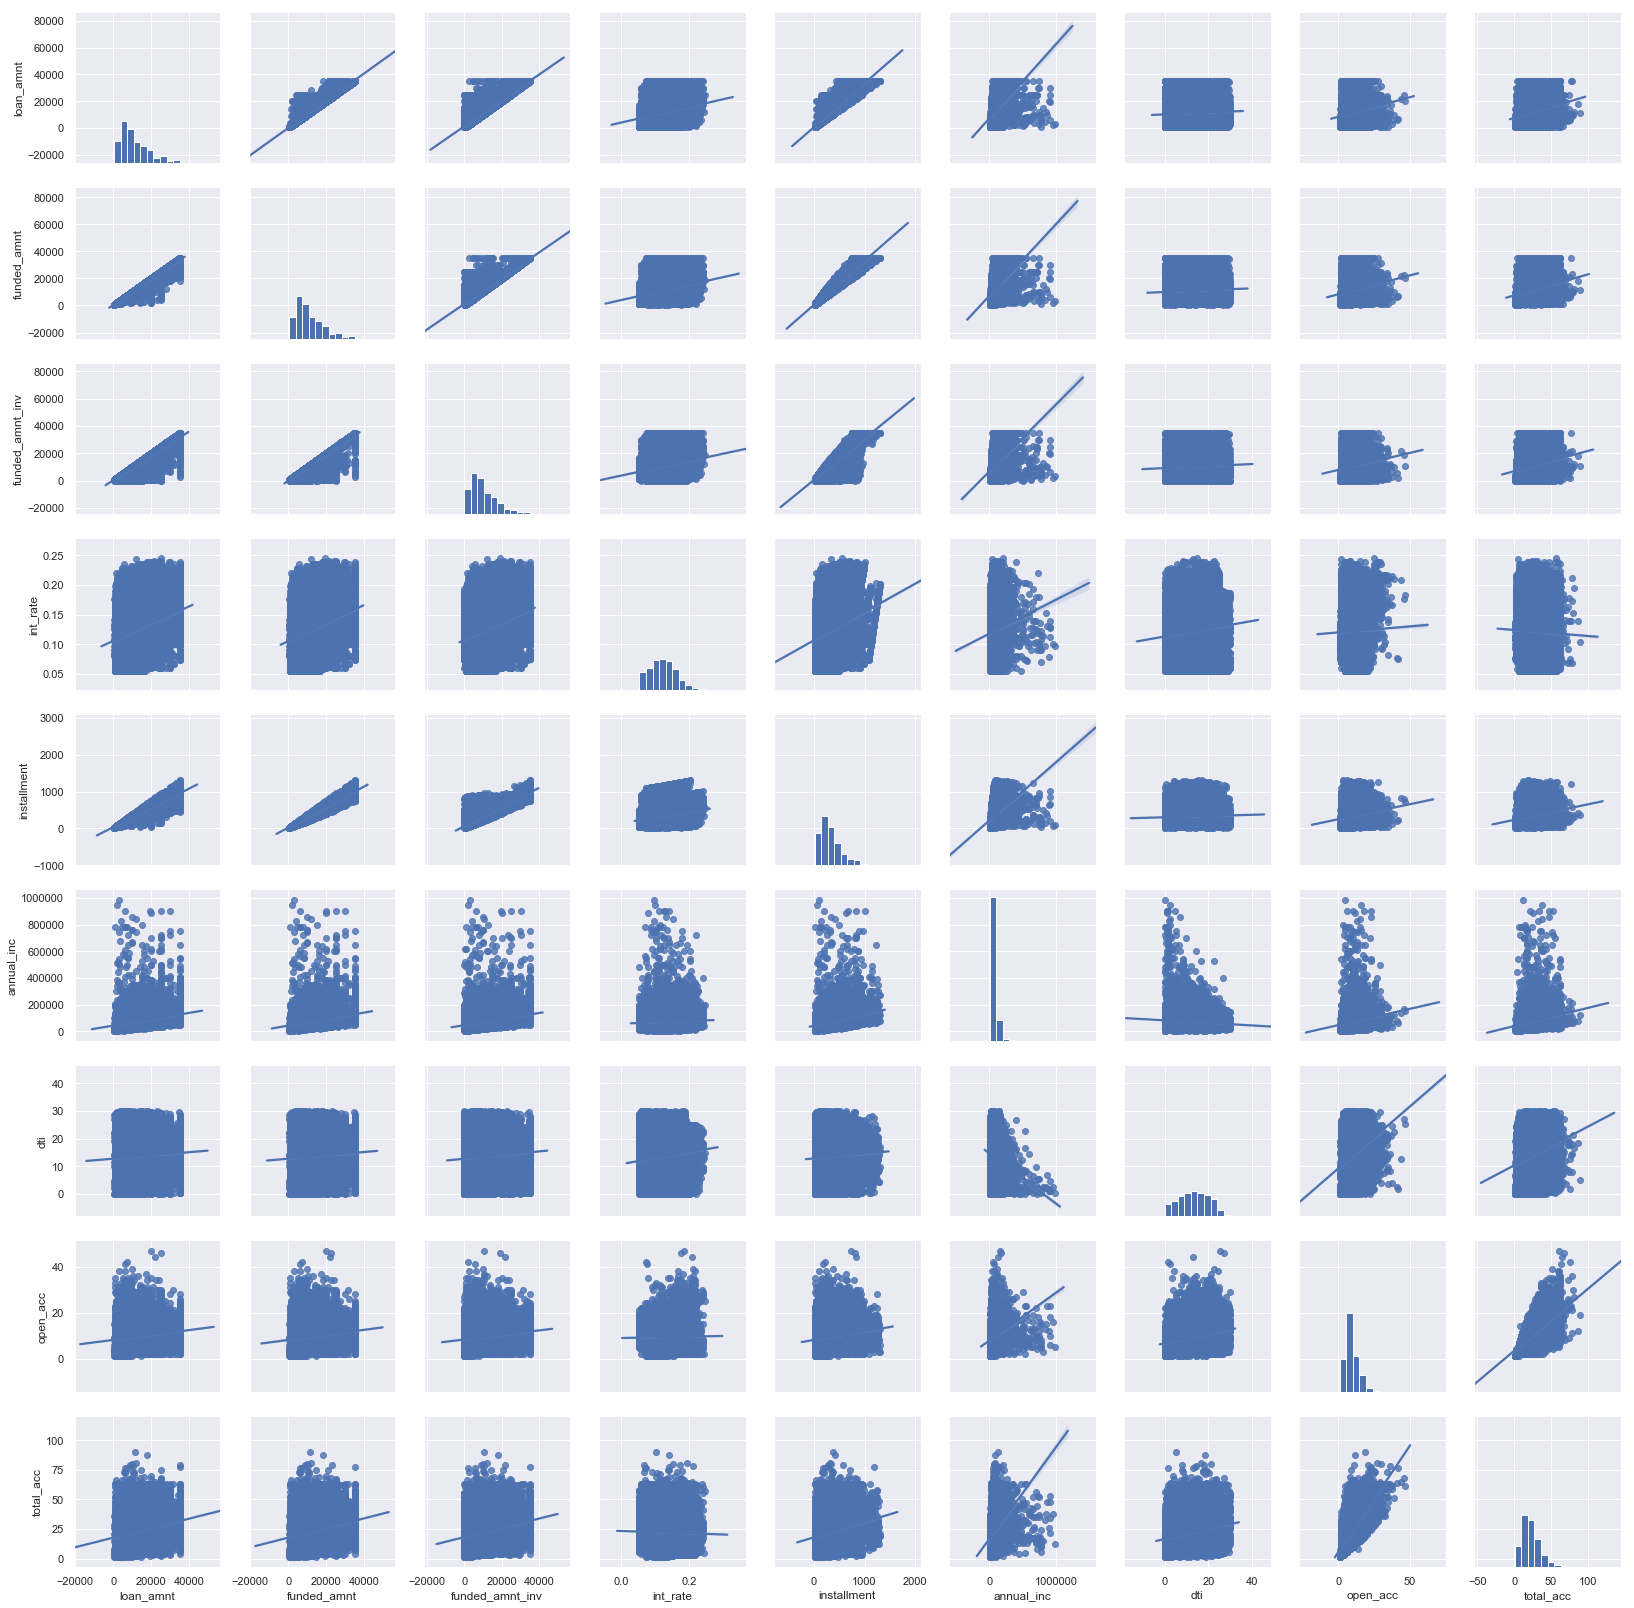

In [37]:
sns.pairplot(df1[df1['annual_inc']<1000000], vars=numerical_data, kind='reg', diag_kind='hist')
plt.show()

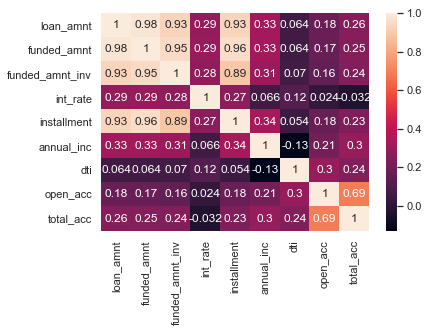

In [38]:
# Correlation matrix
corr = df1[numerical_data].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [39]:
mask=np.triu(np.ones_like(corr, dtype=bool))

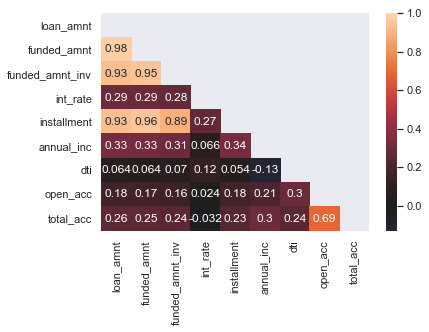

In [40]:
# Correlation matrix without diagnols and duplicates
sns.heatmap(corr, mask=mask, annot=True, center=0)
plt.show()

In [41]:
# Adding profit/loss column for EDA 
df1['profit/loss']=  (df1['total_rec_prncp']+df1['total_rec_int']) - df1['funded_amnt'] 
# Creating profit margin columns for EDA
df1['margins'] = df1['profit/loss']/ df1.funded_amnt 
# Making the loan status feature into a dummy variable
df1.loan_status = df1.loan_status.replace(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'], 0)
df1.loan_status = df1.loan_status.replace(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'], 1)
df1.loan_status.unique()

array([0, 1])

In [42]:
# The default rate of each grade group
default_rate_by_grade = df1.groupby('grade').mean()['loan_status']
default_rate_by_grade

grade
A    0.059870
B    0.122444
C    0.172267
D    0.220130
E    0.259829
F    0.318673
G    0.337917
Name: loan_status, dtype: float64

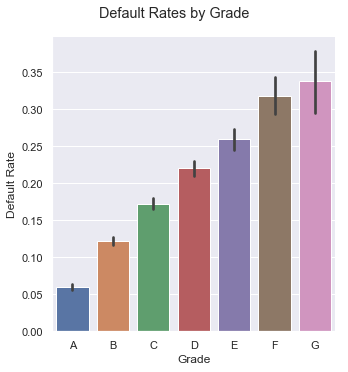

In [43]:
drg = sns.catplot(kind='bar', data=df1, x='grade', y='loan_status')
drg.set(xlabel='Grade', ylabel='Default Rate')
drg.fig.suptitle('Default Rates by Grade', y=1.03)
plt.show()

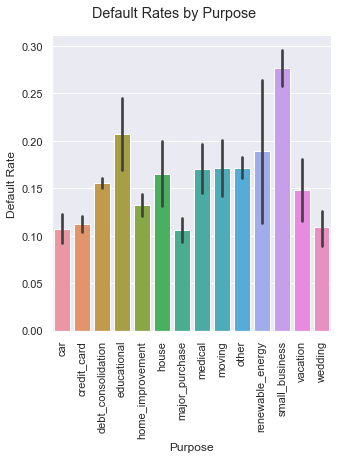

In [44]:
drp = sns.catplot(kind='bar', x='purpose', y='loan_status', data=df1)
drp.set(xlabel='Purpose', ylabel='Default Rate')
drp.fig.suptitle('Default Rates by Purpose', y=1.03)
plt.xticks(rotation=90)
plt.show()

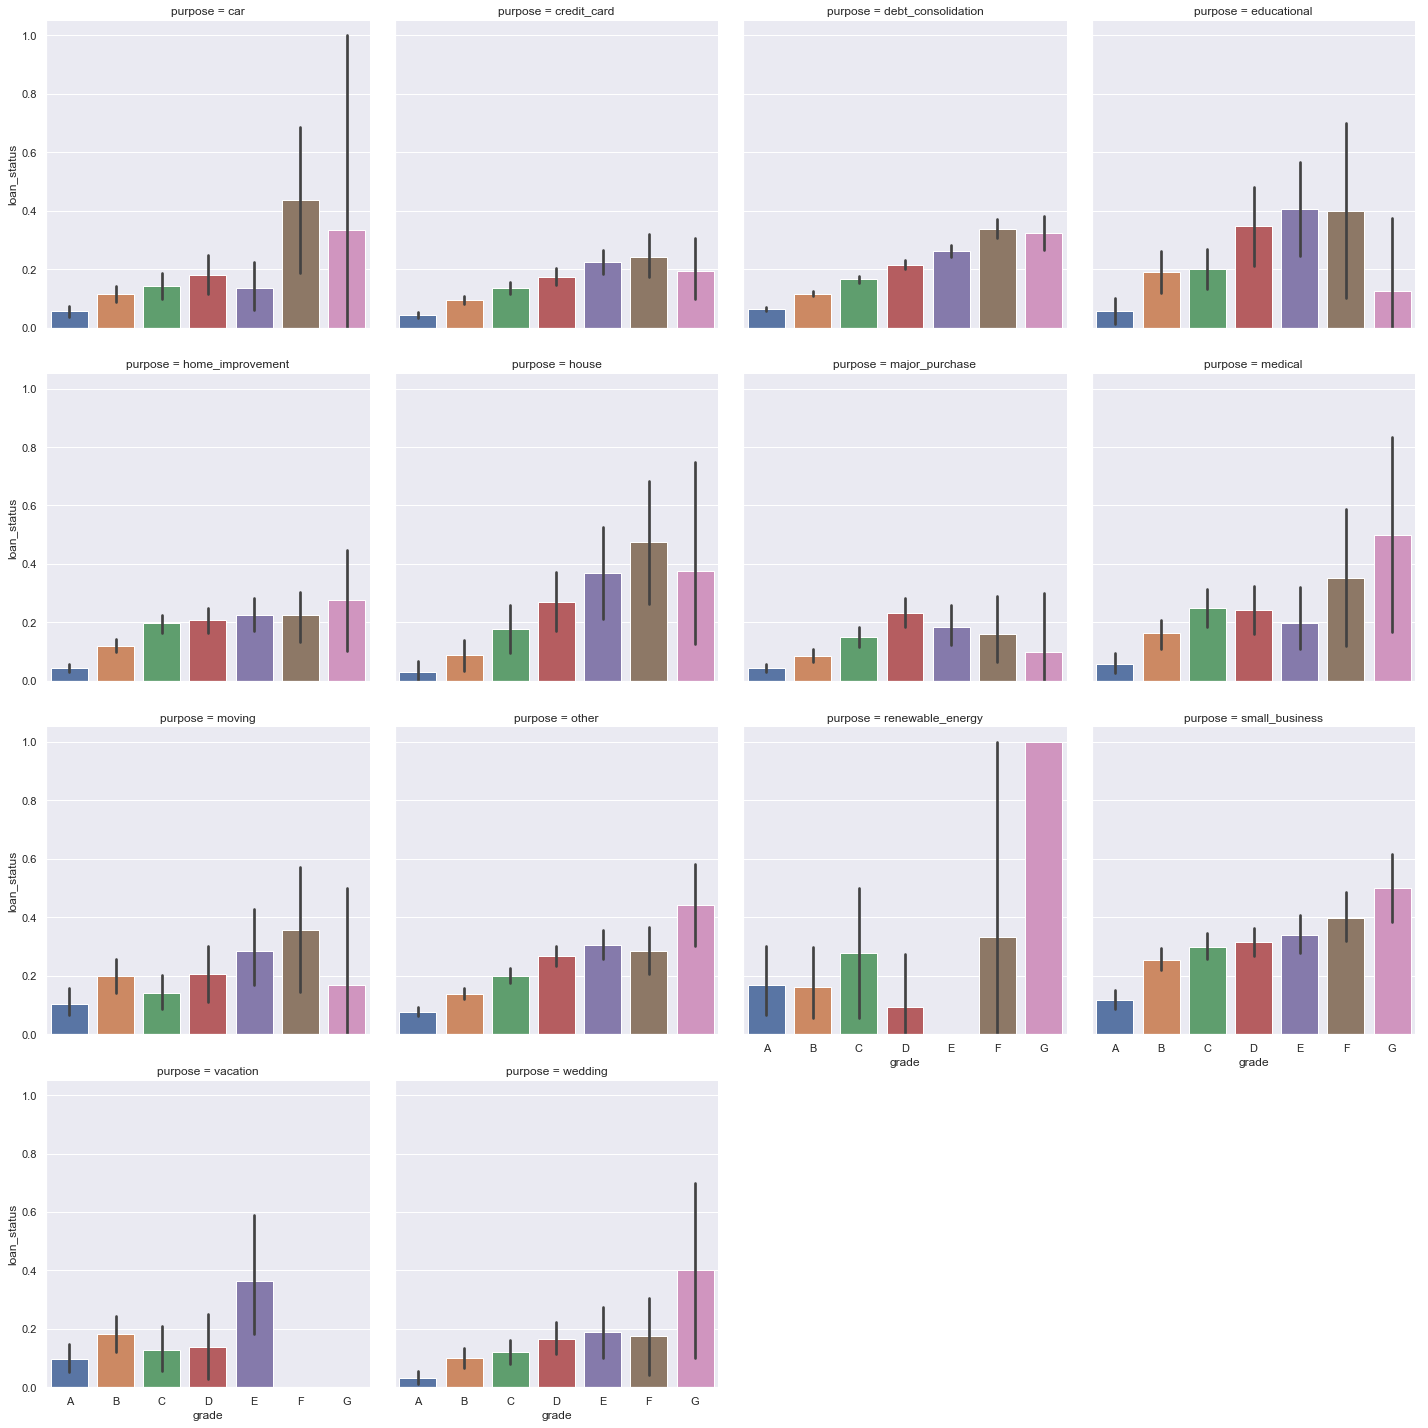

In [45]:
drps = sns.catplot(data=df1, col='purpose', col_wrap=4 , x='grade', y='loan_status', kind='bar')
plt.show()

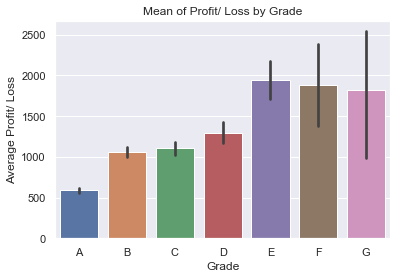

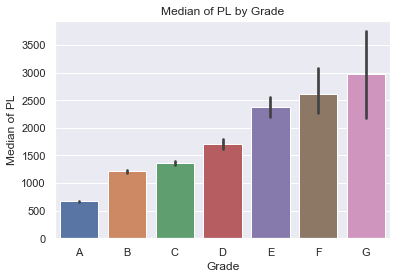

In [46]:
# Comparing median and mean of profit/losses by grade
mean_pl = sns.barplot(data=df1, x='grade', y='profit/loss')
mean_pl.set(xlabel='Grade', ylabel='Average Profit/ Loss') 
mean_pl.set_title('Mean of Profit/ Loss by Grade')
plt.show()

from numpy import median
med_pl = sns.barplot(estimator=median, data=df1, x='grade', y='profit/loss')
med_pl.set(xlabel='Grade', ylabel='Median of PL')
med_pl.set_title('Median of PL by Grade')
plt.show()

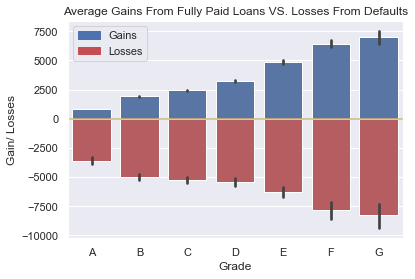

In [47]:
# Comparing average gains from fully paid loans to average losses from defaults
import matplotlib.patches as mpatches
ax = plt.gca()
gl = sns.barplot(data=df1[df1['loan_status']==0], x='grade', y='profit/loss', ax=ax, color='b')
gl = sns.barplot(data=df1[df1['loan_status']==1], x='grade', y='profit/loss', ax=ax, color='r')
gl.set(xlabel='Grade', ylabel='Gain/ Losses')
gl.set_title('Average Gains From Fully Paid Loans VS. Losses From Defaults')

Gains = mpatches.Patch(color='b', label='Gains')
Losses = mpatches.Patch(color='r', label='Losses')
plt.legend(handles=[Gains, Losses])
plt.axhline(color='y')
plt.show()

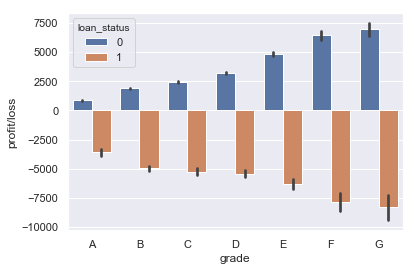

In [48]:
gl = sns.barplot(data=df1, x='grade', y='profit/loss', hue='loan_status')

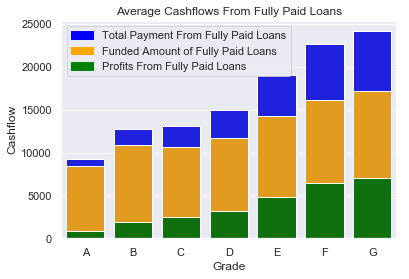

In [49]:
ax = plt.gca() 
fpfa = sns.barplot(data=df1[df1['loan_status']==0], x='grade', y='total_pymnt', ci=None, ax=ax, color='blue')
fptp = sns.barplot(data=df1[df1['loan_status']==0], x='grade', y='funded_amnt', ci=None, ax=ax, color='orange')
fppl = sns.barplot(data=df1[df1['loan_status']==0], x='grade', y='profit/loss', ci=None, ax=ax, color='green')
tp = mpatches.Patch(color='blue', label='Total Payment From Fully Paid Loans')
fa = mpatches.Patch(color='orange', label='Funded Amount of Fully Paid Loans')
pl = mpatches.Patch(color='green', label='Profits From Fully Paid Loans')
handles = [tp, fa, pl]
plt.legend(handles=handles)
fpfa.set(xlabel='Grade', ylabel='Cashflow', title='Average Cashflows From Fully Paid Loans')
plt.show()



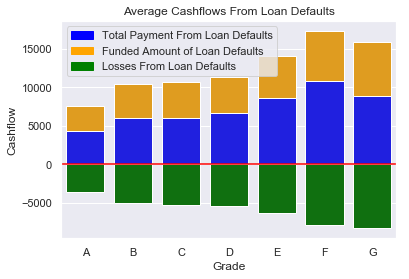

In [50]:
ax2 = plt.gca()
dfa = sns.barplot(data=df1[df1['loan_status']==1], x='grade', y='funded_amnt', ci=None, ax=ax2, color='orange')
dtp = sns.barplot(data=df1[df1['loan_status']==1], x='grade', y='total_pymnt', ci=None, ax=ax2, color='blue')
dpl = sns.barplot(data=df1[df1['loan_status']==1], x='grade', y='profit/loss', ci=None, ax=ax2, color='green')
tpd = mpatches.Patch(color='blue', label='Total Payment From Loan Defaults')
fad = mpatches.Patch(color='orange', label='Funded Amount of Loan Defaults')
pld = mpatches.Patch(color='green', label='Losses From Loan Defaults')
handles = [tpd, fad, pld]
plt.legend(handles=handles)
dfa.set(xlabel='Grade', ylabel='Cashflow', title='Average Cashflows From Loan Defaults')
plt.axhline(color='red')
plt.show()

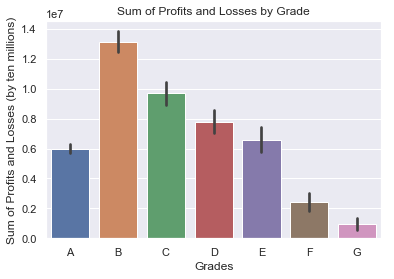

In [51]:
from numpy import sum
spl = sns.barplot(data=df1, x='grade', y='profit/loss', estimator=sum)
spl.set(xlabel='Grades', ylabel='Sum of Profits and Losses (by ten millions)', title='Sum of Profits and Losses by Grade')
plt.show()

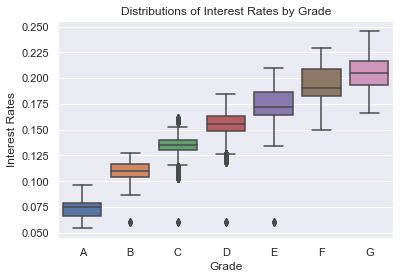

In [52]:
intrates = sns.boxplot(data=df1, x='grade', y='int_rate')
intrates.set(xlabel='Grade', ylabel='Interest Rates', title='Distributions of Interest Rates by Grade')
plt.show()

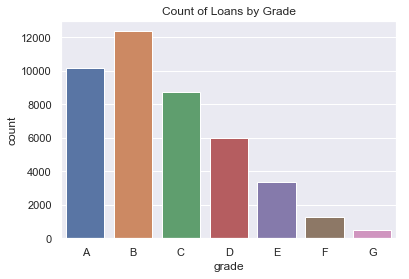

In [53]:
countgrade = sns.countplot(data=df1, x='grade')
countgrade.set(title='Count of Loans by Grade')
plt.show()

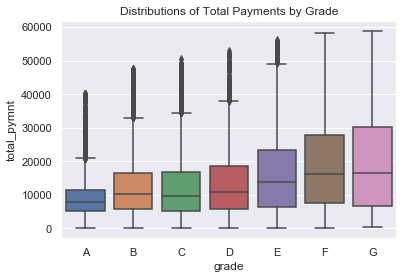

In [54]:
boxtp = sns.boxplot(data=df1, x='grade', y='total_pymnt')
boxtp.set_title('Distributions of Total Payments by Grade')
plt.show()

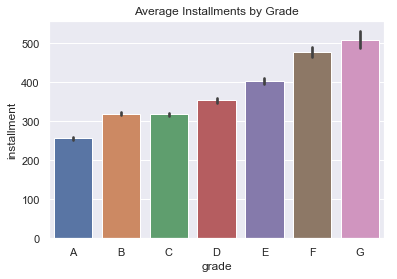

In [55]:
ins = sns.barplot(data=df1, x='grade', y='installment')
ins.set_title('Average Installments by Grade')
plt.show()

In [56]:
# Creating variable called real margins. The percentage of the total gains and losses for grade 
fa = df1.groupby('grade').sum()['funded_amnt']
pl = df1.groupby('grade').sum()['profit/loss']
realmargins = pl/fa

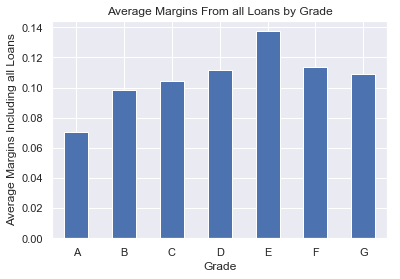

In [57]:
# Adding up all profits/ losses and funded amount of each grade and dividing them to get the total margins for
# each grade
_ = realmargins.plot(kind='bar')
_ = plt.xlabel('Grade')
_ = plt.ylabel('Average Margins Including all Loans')
_ = plt.title('Average Margins From all Loans by Grade')
_ = plt.xticks(rotation=360)
plt.show()

In [58]:
# Creating variables of total margins for each grade splitting them into fully paid and defaulted loans. 
# Getting the total profit margins from fully paid loans and loss percentages for each grade
fpfa = df1.loc[df1['loan_status']==0].groupby('grade').sum()['funded_amnt']
fppl = df1.loc[df1['loan_status']==0].groupby('grade').sum()['profit/loss']
fprealmargins = fppl/fpfa
dfa = df1.loc[df1['loan_status']==1].groupby('grade').sum()['funded_amnt']
dpl = df1.loc[df1['loan_status']==1].groupby('grade').sum()['profit/loss']
defaultmargins = dpl/ dfa

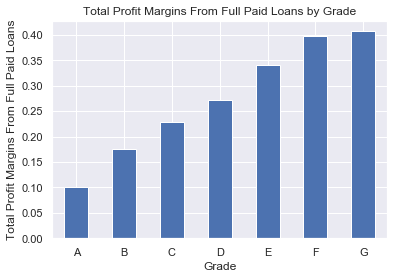

In [59]:
# Total profit margins by grade
_ = fprealmargins.plot(kind='bar')
_ = plt.xlabel('Grade')
_ = plt.ylabel('Total Profit Margins From Full Paid Loans')
_ = plt.title('Total Profit Margins From Full Paid Loans by Grade')
_ = plt.xticks(rotation=360)
plt.show()

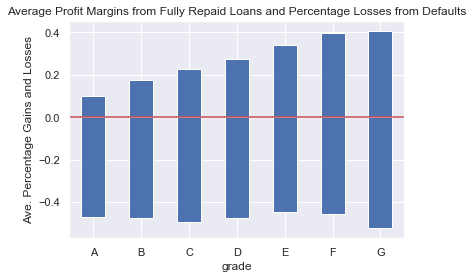

In [60]:
# Comparing total profit margins from fully repaid loans to total loss percentage from defaults for each grade
ax = plt.gca()
_  = fprealmargins\
.plot(kind='bar', title = "Average Profit Margins from Fully Repaid Loans and Percentage Losses from Defaults", legend = None, ax=ax)
_.set_xticklabels(['A','B','C','D','E','F','G'])
_ = plt.xlabel('Grade')
_ = plt.ylabel('Ave. Percentage Gains and Losses')
_ = defaultmargins.\
plot(kind='bar', ax=ax)
_.set_xticklabels(['A','B','C','D','E','F','G'])
_ = plt.axhline(y=0, color='r', linestyle='-')
_ = plt.xticks(rotation=360)
plt.show()

# Inferential Statistics

In [61]:
def gradevariable(letter, variable):
    """Get grade and variable"""
    gradevariablearray = df1.loc[df1['grade']==letter][variable]
    return gradevariablearray

In [62]:
def obs_diff_means(data1, data2):
    """difference of means between observed means"""
    diff_mean = np.mean(data1)-np.mean(data2)
    return diff_mean

In [63]:
def p_value(letter1, letter2, variable):
    """To get p value to test difference in means and dist's"""
    
    array1 = gradevariable(letter1, variable)
    array2 = gradevariable(letter2, variable)
    
    diffmeans = obs_diff_means(array1, array2)
    
    perm_replicates = np.empty(10000)
    for i in range(10000):
        concat = np.concatenate((array1, array2))
        perm_data = np.random.permutation(concat)
        perm_sample1 = perm_data[:len(array1)]
        perm_sample2 = perm_data[len(array1):]
        perm_replicates[i] = np.mean(perm_sample1) - np.mean(perm_sample2)
        
    if diffmeans < 0:
        p_value = np.sum(perm_replicates <= diffmeans)/len(perm_replicates)
    else:
        p_value = np.sum(perm_replicates >= diffmeans)/len(perm_replicates)
        
    print(letter1, letter2, p_value)

In [64]:
def bs_rep_variable(gradevariablearray):
    """Get the BS reps for grade and variable"""
    bs_replicates_obs = np.empty(10000)
    for i in range(10000):
        bs_replicates_obs[i]=np.mean(np.random.choice(gradevariablearray, len(gradevariablearray)))
    return bs_replicates_obs

In [65]:
def allfuncplt(letter1, letter2, variable):
    """To plot dist of BS_reps to compare respective dist's"""
    
    array1 = gradevariable(letter1, variable)
    array2 = gradevariable(letter2, variable)

    samplemeans1 = bs_rep_variable(array1)
    samplemeans2 = bs_rep_variable(array2)

    _ = plt.hist(samplemeans1, bins=20, alpha = .7)
    _ = plt.hist(samplemeans2, bins=20, alpha = .7)
    plt.show()

In [66]:
# P values of differences in dist of default rates per grade. 
for a in ['B','C','D','E','F','G']:
    p_value('A',a, 'loan_status')
for b in ['C','D','E','F','G']:
    p_value('B',b, 'loan_status')
for c in ['D','E','F','G']:
    p_value('C',c, 'loan_status')
for d in ['E','F','G']:
    p_value('D',d, 'loan_status')
for e in ['F','G']:
    p_value('E',e, 'loan_status')
for f in ['G']:
    p_value('F',f, 'loan_status')

A B 0.0
A C 0.0
A D 0.0
A E 0.0
A F 0.0
A G 0.0
B C 0.0
B D 0.0
B E 0.0
B F 0.0
B G 0.0
C D 0.0
C E 0.0
C F 0.0
C G 0.0
D E 0.0
D F 0.0
D G 0.0
E F 0.0
E G 0.0001
F G 0.2337


In [67]:
def pvaluefunk(variable):
    """Get p values between every grade"""
    for a in ['B','C','D','E','F','G']:
        p_value('A',a, variable)
    for b in ['C','D','E','F','G']:
        p_value('B',b, variable)
    for c in ['D','E','F','G']:
        p_value('C',c, variable)
    for d in ['E','F','G']:
        p_value('D',d, variable)
    for e in ['F','G']:
        p_value('E',e, variable)
    for f in ['G']:
        p_value('F',f, variable)

In [68]:
# P values for interest rate differences of dist. between grades. Null is that
pvaluefunk('int_rate')

A B 0.0
A C 0.0
A D 0.0
A E 0.0
A F 0.0
A G 0.0
B C 0.0
B D 0.0
B E 0.0
B F 0.0
B G 0.0
C D 0.0
C E 0.0
C F 0.0
C G 0.0
D E 0.0
D F 0.0
D G 0.0
E F 0.0
E G 0.0
F G 0.0


In [69]:
# P values of differences in dist. of margins between grades grade. 
pvaluefunk('margins')

A B 0.0
A C 0.0
A D 0.0
A E 0.0
A F 0.0
A G 0.0005
B C 0.1416
B D 0.0085
B E 0.0
B F 0.019
B G 0.4505
C D 0.1164
C E 0.0
C F 0.1187
C G 0.4332
D E 0.0033
D F 0.3283
D G 0.2946
E F 0.1223
E G 0.062
F G 0.2817
